In [ ]:
##############################################
# Programmer: Jaleel Attah
# Class: CptS 215, Fall 2019
# Programming-Assignment #2
# Due: 9/29/2019
#
# Description: we build a k means clustering method from scratch 
##############################################

In [1]:
#IMPORTS

import pandas as pd
from pandas import DataFrame
import numpy as np 
import matplotlib.pyplot as plt
import random
import math

In [2]:
#METHODS

#Store data frame and initialize them with clusters
def store(path,k):
    return DataFrame(pd.read_csv(path,header=None,index_col=0))

#initialize 
def ini(centroids,df):
    newclusters = []
    dfI = df.values.tolist()
    centroidsI = centroids.values.tolist()
    for i in dfI:
        compare = []
        for j in centroidsI:
            compare.append(euc(np.array(i),np.array(j)))
        newclusters.append(compare.index(min(compare))+1)
    df["cluster"] = newclusters
    return df.sort_values(['cluster'])

#eucilid method
def euc(i,j):
    return math.sqrt(sum([(a - b) ** 2 for a, b in zip(i, j)]))

#create centroids
def cents(df,k):
    cent = []
    for i in range(0,k):
        val = []
        for j in range(0,len(df.columns)):
            val.append(random.uniform(df.values.min(),df.values.max()).round(1))
        cent.append(val)                   
    return DataFrame(cent)

#Recreate centroids
def cent(df):
    return df.groupby('cluster').mean().round(1) 

#reassign clusters based on closeness 
def reassign(df,centroids):
    newclusters = []
    dfI = df.values.tolist()
    centroidsI = centroids.values.tolist()
    for i in dfI:
        compare = []
        for j in centroidsI:
            compare.append(euc(np.array(i),np.array(j)))
        newclusters.append(compare.index(min(compare))+1)
    df["cluster"] = newclusters
    return df.sort_values(['cluster'])

#Create plot method
def plot(df):
    plt.pcolor(df,cmap='seismic')
    plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
    plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
    plt.gca().invert_yaxis()
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.xticks([])
    plt.yticks([])
    #plt.axhline(y=3 ,color='black', linestyle='-')
    plt.show()
    
#k means clustering loop 
def main(df,centroids,oldcentroids):
    count = 0
    while oldcentroids.equals(centroids) == False:
        count = count+1
        df = reassign(df,centroids)
        o = centroids
        centroids = cent(df)
        oldcentroids = o
    plot(df[df.columns[:-1]])

In [3]:
# number of clusters
k = 2
#importing dataset and initializing the clusters
df = store("C:\\Users\\blue\\Desktop\\cancer.csv",k)

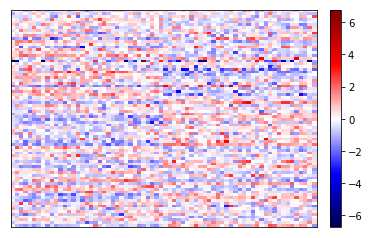

In [4]:
#plotting first time
plot(df)

In [5]:
#creating centroids based off dataframe
centroids = cents(df,k)

In [6]:
#initialize 
df = ini(centroids,df)

#running reassigning 
df = reassign(df,centroids)

#new centroids and storing the old ones
oldcentroids = centroids
centroids = cent(df)

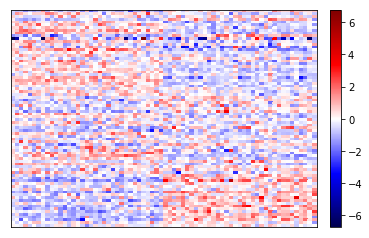

In [7]:
#plotting new dataframe
plot(df[df.columns[:-1]])

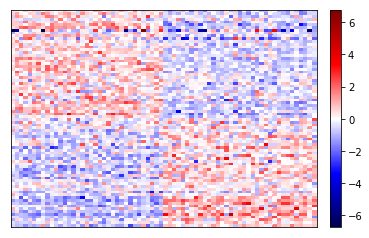

In [8]:
#running until its sorted
main(df,centroids,oldcentroids)

# Discussion 

* After running the k means clustering we can see that before being sorted with centroids the data is all over the place. After one run we see a slight change to the heat mapm but after multiple runs we see that data is as sorted as best as possible. 
* Since we have random centroids generated the end result will always differ, but in general it is easily clear where the data is similar on the heat map.
